In [265]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [266]:
# carregando o dataset
data_to_load = pd.read_csv("Datasets/train.csv")
data_to_load

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [267]:
# tipos das colunas
data_to_load.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [268]:
# colunas com valores NaN
data_to_load.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [269]:
# convertendo variáveis categóricas para numéricas [female = 0, male = 1]
data_to_load['Sex'].replace(['female','male'], [0,1], inplace=True)

# ajustando valores NaN 
data_to_load["Age"] = data_to_load["Age"].fillna(method='ffill').fillna(method='bfill')
data_to_load["Embarked"] = data_to_load["Embarked"].fillna(method='ffill').fillna(method='bfill')
data_to_load = data_to_load.drop("Cabin", axis=1)

# arredondando as idades para cima
data_to_load["Age"] = np.ceil(data_to_load["Age"])
data_to_load["Age"].astype(int)

data_to_load

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,19.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C


In [270]:
# colunas com valores NaN
data_to_load.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [271]:
# filtrando dados para teste
df = data_to_load[["PassengerId", "Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,19.0,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


In [272]:
# y -> target (variavel dependete)
# x -> variaveis independentes
y = df[["Survived"]]
x = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]

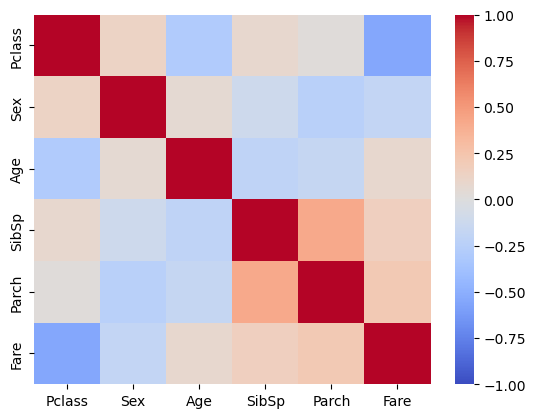

In [273]:
sns.heatmap(x.corr(), annot=False, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

In [274]:
# fazendo split do dataset
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [275]:
# criando um modelo de regressão linear
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [276]:
reg.score(x_train, y_train)

0.39528036972262626

In [277]:
# predicoes
y_pred = reg.predict(x_test) 
y_pred

array([[ 0.39066643],
       [ 0.38946856],
       [ 0.10726468],
       [ 0.01145497],
       [ 0.31396333],
       [ 0.93569959],
       [ 0.74704359],
       [ 0.12950263],
       [ 0.07675711],
       [ 0.30988768],
       [ 0.17786131],
       [ 0.41496989],
       [ 0.00136973],
       [ 0.64568074],
       [ 0.16279022],
       [ 0.64586849],
       [ 0.00342486],
       [ 0.76305011],
       [ 0.85366228],
       [ 0.05193807],
       [-0.06453566],
       [ 0.55306612],
       [ 0.43620399],
       [ 0.66246151],
       [ 0.3359965 ],
       [ 0.03666805],
       [ 1.07042553],
       [ 0.15919853],
       [ 0.32300725],
       [ 0.17884083],
       [ 0.59521819],
       [ 0.25076038],
       [ 0.14354948],
       [ 0.15238233],
       [ 0.21718273],
       [ 0.42875739],
       [ 0.48408869],
       [ 0.08541604],
       [ 0.68599659],
       [ 0.04606416],
       [ 0.78826319],
       [ 0.13178512],
       [ 0.12217911],
       [ 0.72843644],
       [ 0.0510193 ],
       [ 0

In [278]:
# passando o vetor das predições para um dataframe
survived_predictions = pd.DataFrame(y_pred, columns=['Survived'])
survived_predictions

,Survived
0,0.390666
1,0.389469
2,0.107265
3,0.011455
4,0.313963
...,...
218,0.293793
219,0.056709
220,0.584891
221,1.016557


In [279]:
# arredondando para 0 ou 1 e utilizando abs para ajustar as predições
survived_predictions = survived_predictions.round()
survived_predictions = survived_predictions.abs()
survived_predictions

,Survived
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
218,0.0
219,0.0
220,1.0
221,1.0


In [280]:
survived_predictions['PassengerId'] = survived_predictions.index + 1

In [281]:
# reordenando colunas
cols = survived_predictions.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols

['PassengerId', 'Survived']

In [282]:
survived_predictions = survived_predictions[cols]

In [283]:
# convertendo predições para int
survived_predictions = survived_predictions.astype({'Survived':'int'})

In [284]:
with pd.option_context('display.max_rows', None,):     
    print(survived_predictions)

     PassengerId  Survived
0              1         0
1              2         0
2              3         0
3              4         0
4              5         0
5              6         1
6              7         1
7              8         0
8              9         0
9             10         0
10            11         0
11            12         0
12            13         0
13            14         1
14            15         0
15            16         1
16            17         0
17            18         1
18            19         1
19            20         0
20            21         0
21            22         1
22            23         0
23            24         1
24            25         0
25            26         0
26            27         1
27            28         0
28            29         0
29            30         0
30            31         1
31            32         0
32            33         0
33            34         0
34            35         0
35            36         0
3

In [285]:
survived_predictions.to_csv('out.csv', index=False)